# Figure 6 and Figure 7: Whitening the Data

**Alex B. Nielsen<sup>1,2</sup>, Alexander H. Nitz<sup>1,2</sup>, Collin Capano<sup>1,2</sup>, and Duncan A. Brown<sup>3</sup>**

 <sub>1. [Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-30167 Hannover, Germany](http://www.aei.mpg.de/obs-rel-cos)</sub>  
 <sub>2. Leibniz Universitat Hannover, D-30167 Hannover, Germany</sub>  
 <sub>3. Department of Physics, Syracuse University, Syracuse, NY 13244, USA</sub>  

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

We encourage use of these data in derivative works. If you use the material provided here, please cite [our paper.](https://arxiv.org/abs/1811.04071)

## Set up

Before running this notebook, you should run the [CreateResiduals](https://github.com/gwastro/gw150914_investigation/blob/master/CreateResiduals.ipynb) notebook to download the strain data and compute the maximum likelihood waveform.

In [1]:
%matplotlib inline
import os
import pylab, numpy
import res
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The plots are written to the directory specified here. You can change the value of `output_dir` to the path where you want the plots to be written.

In [2]:
output_dir = '../paper'
!mkdir -p {output_dir}

## Read in data, whiten, and compute correlation

In [3]:
strain = res.get_raw_strain()

Correlation of the whitened data containing the GW160914 signal.

In [4]:
ts = res.whiten(strain)
tau, corr = res.cross_correlation(ts['H1'], ts['L1'], res.corr_time)
print res.corr_near_ml(corr)

0.9573835587324562


Correlation of the whitened residuals.

In [5]:
ts3 = res.get_residual_strain()
ts3 = res.whiten(ts3)
tau, corr_null2 = res.cross_correlation(ts3['H1'], ts3['L1'], res.corr_time)
print res.corr_near_ml(corr_null2)

0.2724454980079768


## Figure 6

The power spectral density of the data before and after applying the band-pass and notching procedure, used to produce Fig. 1 of [Abbott et al](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102). It is apparent that not all of the spectral lines are removed by the simple choices made to produce Fig. 1 of [Abbott et al](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102). The power spectral density after applying the whitening procedure employed in this section is also shown for comparison.

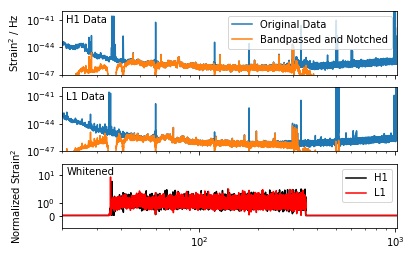

In [6]:
fig, axs = pylab.subplots(3, 1, sharex=True)
bp = res.bandpass(strain)
for ifo, ax in zip(res.ifos, axs):
    # power spectrum of the data
    pylab.sca(ax)
    pylab.text(21, .4e-41, '%s Data' % ifo)
    psd = strain[ifo].psd(32)
    pylab.plot(psd.sample_frequencies, psd, label='Original Data')
    
    # Power spectrum of the bandpassed data
    psd2 = bp[ifo].psd(32)
    pylab.plot(psd2.sample_frequencies, psd2, label='Bandpassed and Notched')
    
    if ifo=='H1':
        pylab.ylabel('Strain$^2$ / Hz')
        pylab.legend(loc='upper right', fontsize=10)
    pylab.xlim(20, 1024)
    pylab.ylim(1e-47, 1e-40)
    pylab.xscale('log')
    pylab.yscale('log')
    
pylab.sca(axs[2])
# power spectrum of the whitened data
pylab.text(21, 10, 'Whitened')
for ifo, color in zip(res.ifos, ['black', 'red']):
    psd3 = ts3[ifo].psd(32)
    pylab.plot(psd3.sample_frequencies, psd3, label=ifo, c=color)
    pylab.ylabel('Normalized Strain$^2$', labelpad=13)
    pylab.ylim(-1, 30)
    pylab.legend(loc='upper right', fontsize=10)
pylab.yscale('symlog')
pylab.savefig(os.path.join(output_dir,'fig6.png'), dpi=300)

## Figure 7

Correlation of residuals after whitening and subtracting the maximum-likelihood model waveform. The maximum and minimum peaks in the ML residuals (green line) are now away from the time of flight delay of $\sim 7$ ms.

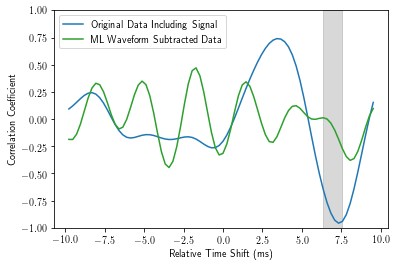

In [7]:
pylab.figure()
pylab.rc('text', usetex=True)
pylab.plot(tau*1000, corr, label='Original Data Including Signal')
pylab.plot(tau*1000, corr_null2, label='ML Waveform Subtracted Data', color='tab:green')
pylab.xlabel('Relative Time Shift (ms)')

_, _, s, e = res.indices_within_window(corr)
pylab.axvspan(s*1000, e*1000, alpha=0.3, color='grey', zorder=-1)
pylab.legend()
pylab.ylim(-1, 1)
pylab.ylabel('Correlation Coefficient')
pylab.savefig(os.path.join(output_dir,'fig7.pdf'), dpi=200)